# Objective
**BASIC STATISTICS**
Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset

Introduction
●	To perform descriptive analytics, visualize data distributions, and preprocess the dataset for further analysis.
Descriptive Analytics for Numerical Columns

●	Objective: To compute and analyze basic statistical measures for numerical columns in the dataset.

●	Steps:
	Load the dataset into a data analysis tool or programming environment (e.g., Python with pandas library).
	Identify numerical columns in the dataset.
	Calculate the mean, median, mode, and standard deviation for these columns.
	Provide a brief interpretation of these statistics.

Data Visualization

●	Objective: To visualize the distribution and relationship of numerical and categorical variables in the dataset.

●	Histograms:
	Plot histograms for each numerical column.
	Analyze the distribution (e.g., skewness, presence of outliers) and provide inferences.

●	Boxplots:
	Create boxplots for numerical variables to identify outliers and the interquartile range.
	Discuss any findings, such as extreme values or unusual distributions.

●	Bar Chart Analysis for Categorical Column:
	Identify categorical columns in the dataset.
	Create bar charts to visualize the frequency or count of each category.
	Analyze the distribution of categories and provide insights.
Standardization of Numerical Variables

●	Objective: To scale numerical variables for uniformity, improving the dataset’s suitability for analytical models.

●	Steps:
	Explain the concept of standardization (z-score normalization).
	Standardize the numerical columns using the formula: z=x-mu/sigma



Conversion of Categorical Data into Dummy Variables

●	Objective: To transform categorical variables into a format that can be provided to ML algorithms.

●	Steps:
	Discuss the need for converting categorical data into dummy variables (one-hot encoding).
	Apply one-hot encoding to the categorical columns



## Data loading


Load the sales data.

In [3]:
import pandas as pd

df_sales = pd.read_csv('sales_data_with_discounts.csv')
display(df_sales.head())
print(df_sales.shape)


,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


(450, 13)


## Data exploration


Explore the sales data to understand its structure and identify numerical and categorical columns.



Examine the data types, identify numerical and categorical columns, check for missing values, and print the relevant statistics as per the instructions.



In [4]:
# Identify numerical and categorical columns
numerical_cols = df_sales.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df_sales.select_dtypes(include=['object']).columns.tolist()

# Check for missing values
missing_values = df_sales.isnull().sum()

# Print the shape, data types, missing values, and descriptive statistics
print("Shape of the DataFrame:", df_sales.shape)
print("\nData Types of each column:\n", df_sales.dtypes)
print("\nNumber of missing values per column:\n", missing_values)
print("\nDescriptive statistics for numerical columns:\n", df_sales[numerical_cols].describe())

Shape of the DataFrame: (450, 13)

Data Types of each column:
 Date                  object
Day                   object
SKU                   object
City                  object
Volume                 int64
BU                    object
Brand                 object
Model                 object
Avg Price              int64
Total Sales Value      int64
Discount Rate (%)    float64
Discount Amount      float64
Net Sales Value      float64
dtype: object

Number of missing values per column:
 Date                 0
Day                  0
SKU                  0
City                 0
Volume               0
BU                   0
Brand                0
Model                0
Avg Price            0
Total Sales Value    0
Discount Rate (%)    0
Discount Amount      0
Net Sales Value      0
dtype: int64

Descriptive statistics for numerical columns:
            Volume     Avg Price  Total Sales Value  Discount Rate (%)  \
count  450.000000    450.000000         450.000000         450.000000   
m

## Data analysis


Calculate descriptive statistics for numerical columns.



Identify numerical columns and calculate the mean, median, mode, and standard deviation for each. Store these statistics and provide a brief interpretation.



In [5]:
# Identify numerical columns (already done in previous step, but re-identifying for clarity)
numerical_cols = df_sales.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Calculate descriptive statistics
descriptive_stats = {
    'Mean': df_sales[numerical_cols].mean(),
    'Median': df_sales[numerical_cols].median(),
    'Mode': df_sales[numerical_cols].mode().iloc[0], # .mode() can return multiple values, take the first
    'Standard Deviation': df_sales[numerical_cols].std()
}

# Convert to a DataFrame for better presentation
descriptive_stats_df = pd.DataFrame(descriptive_stats)

print("Descriptive Statistics for Numerical Columns:")
display(descriptive_stats_df)


Descriptive Statistics for Numerical Columns:


,Mean,Median,Mode,Standard Deviation
Volume,5.066667,4.000000,3.000000,4.231602
Avg Price,10453.433333,1450.000000,400.000000,18079.904840
Total Sales Value,33812.835556,5700.000000,24300.000000,50535.074173
Discount Rate (%),15.155242,16.577766,5.007822,4.220602
Discount Amount,3346.499424,988.933733,69.177942,4509.902963
Net Sales Value,30466.336131,4677.788059,326.974801,46358.656624


**Interpretation:**
The table above shows the mean, median, mode, and standard deviation for each numerical column.
- Mean: Represents the average value of the column.
- Median: Represents the middle value when the data is sorted, less affected by outliers than the mean.
- Mode: Represents the most frequently occurring value.
- Standard Deviation: Measures the dispersion or spread of the data around the mean. A larger standard deviation indicates greater variability.

**Observations:**
- 'Volume' has a relatively low standard deviation compared to its mean, suggesting values are clustered around the average volume.
- 'Avg Price', 'Total Sales Value', 'Discount Amount', and 'Net Sales Value' show larger standard deviations relative to their means, indicating more variability in these financial metrics.
- The mean and median are relatively close for most columns, suggesting the distributions are not heavily skewed, although 'Avg Price' and the sales/discount related columns show some difference, which might warrant further investigation for skewness or outliers.
- The mode for 'Volume' is 5, indicating it's the most frequent volume of sale

## Data visualization




Visualize the distribution of numerical and categorical data using histograms, boxplots, and bar charts.



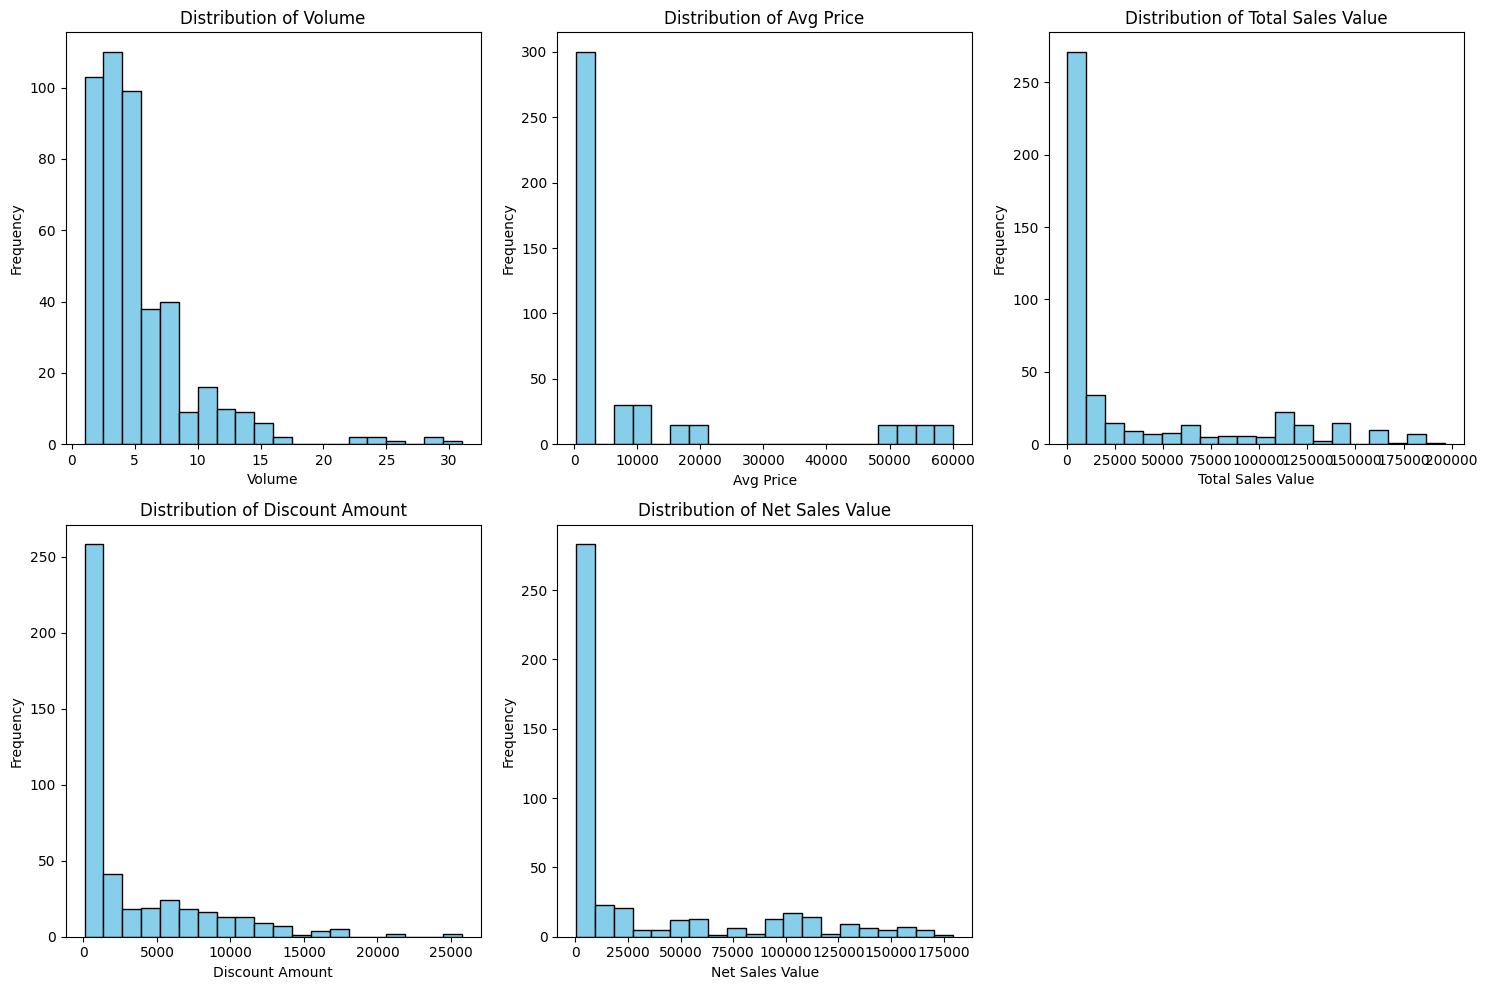

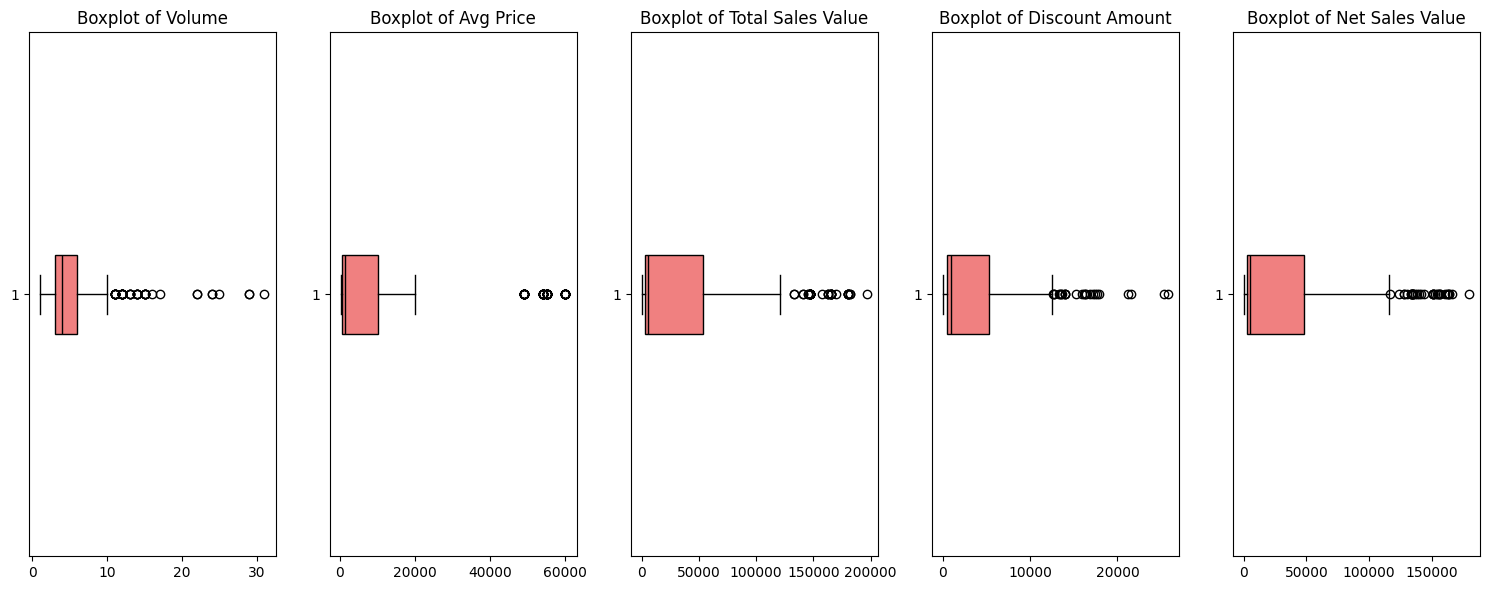

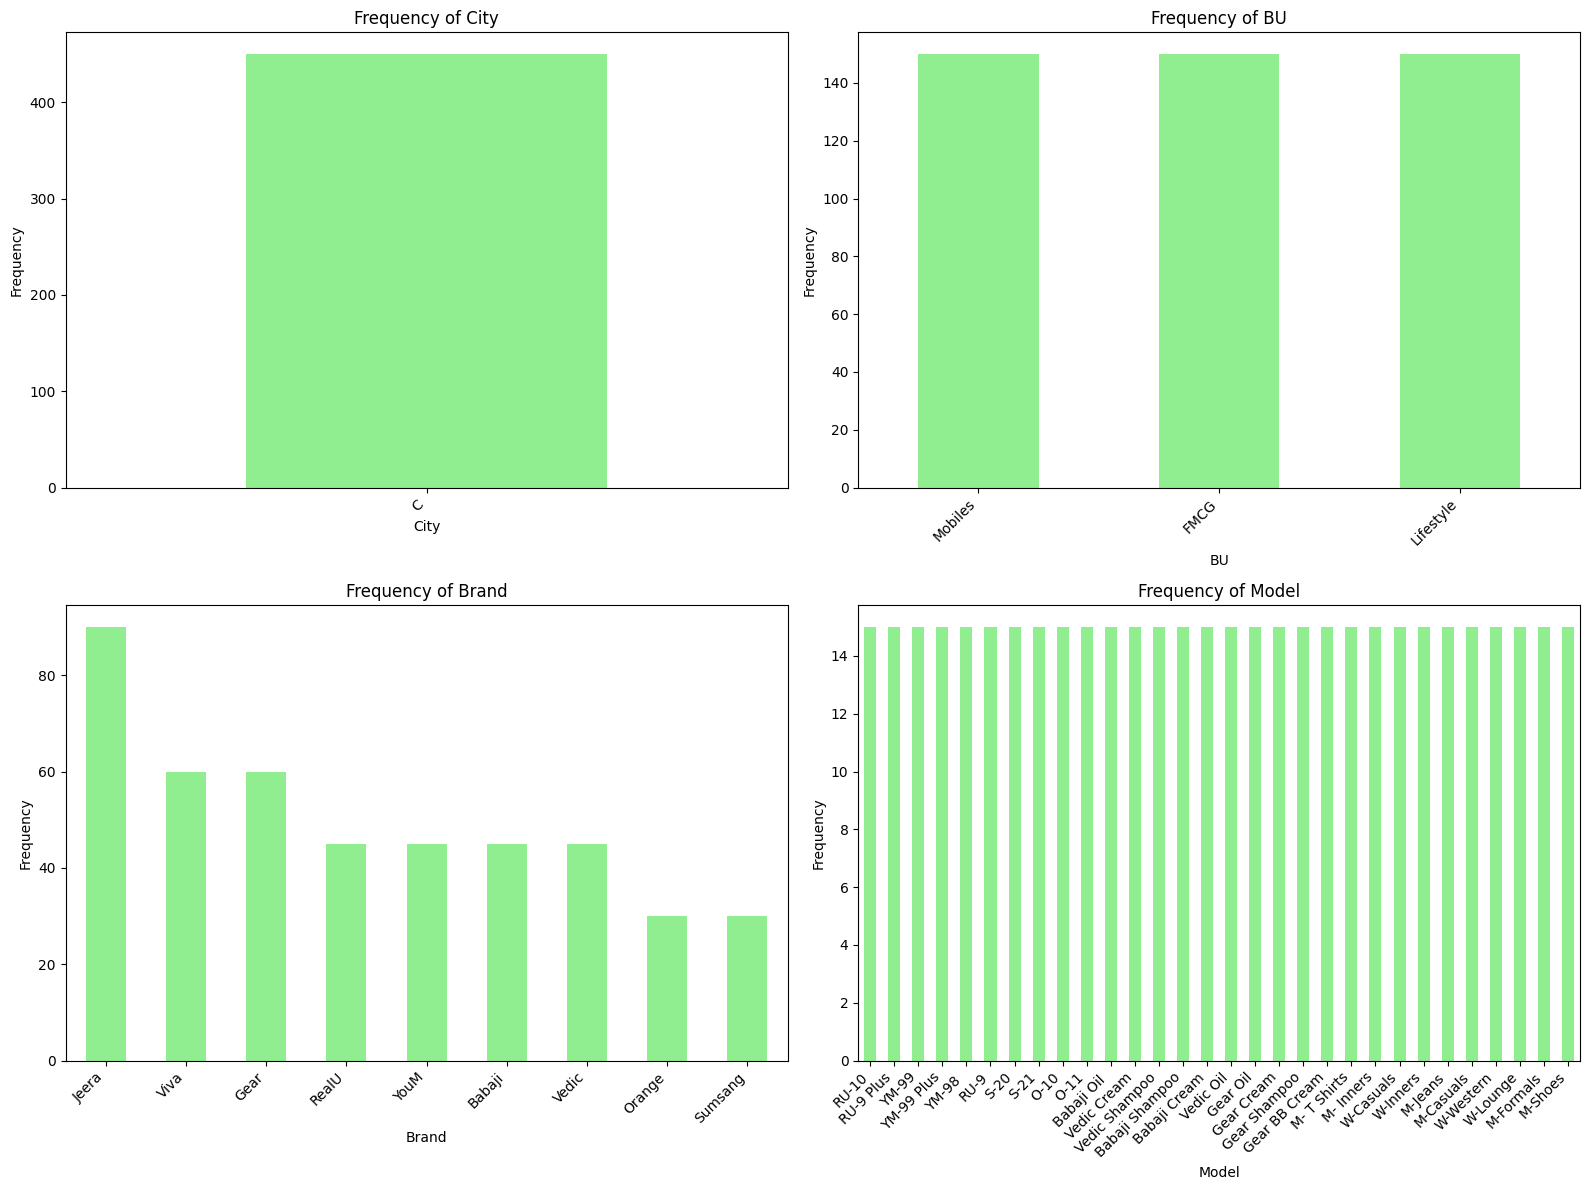

In [6]:
import matplotlib.pyplot as plt

# Histograms for Numerical Columns
plt.figure(figsize=(15, 10))
numerical_cols = ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Amount', 'Net Sales Value']
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    plt.hist(df_sales[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Boxplots for Numerical Columns
plt.figure(figsize=(15, 6))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 5, i + 1)
    plt.boxplot(df_sales[col], vert=False, patch_artist=True,
                boxprops=dict(facecolor='lightcoral'),
                medianprops=dict(color='black'))
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Bar Charts for Categorical Columns
categorical_cols = ['City', 'BU', 'Brand', 'Model']
plt.figure(figsize=(16, 12))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i + 1)
    df_sales[col].value_counts().plot(kind='bar', color='lightgreen')
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insights from the generated visualizations:**

**Histograms:**

Volume: The histogram for Volume appears to be skewed to the right, indicating that lower volumes occur more frequently. There might be a long tail of higher volumes, although they are less common.

Avg Price, Total Sales Value, Discount Amount, Net Sales Value: These histograms likely show distributions that are also skewed to the right. This suggests that most transactions involve lower prices, sales values, discounts, and net sales values, with a smaller number of transactions having significantly higher values. The presence of outliers is also possible in these columns.


**Boxplots:**

Volume: The boxplot for Volume should show the median near the left side of the box, confirming the right skewness. Outliers might be visible as individual points beyond the whiskers on the right side.

Avg Price, Total Sales Value, Discount Amount, Net Sales Value: The boxplots for these financial columns are likely to show the median towards the lower end of the box, and extended whiskers or numerous individual points on the higher end, indicating significant right skewness and the presence of outliers. These outliers represent transactions with exceptionally high values.

**Bar Charts:**

City, BU, Brand, Model: The bar charts for these categorical columns illustrate the frequency of each category. We can observe which cities, business units (BU), brands, and models are most prevalent in the dataset. Uneven bar heights suggest an unbalanced distribution of categories, which might be important for downstream analysis or modeling. For example, if one city or brand accounts for a large majority of the sales, it could dominate the results of any analysis.

## Data preparation

Standardize the numerical features in the `df_sales` DataFrame.



Identify numerical columns from the dataframe and standardize them using z-score normalization. Create new columns to store standardized values.



In [7]:
# Identify numerical columns (already identified in previous steps)
numerical_cols = ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']

# Calculate mean and standard deviation for each numerical column
means = df_sales[numerical_cols].mean()
stds = df_sales[numerical_cols].std()

# Standardize numerical columns using z-score normalization and create new columns
for col in numerical_cols:
    df_sales[col + '_standardized'] = (df_sales[col] - means[col]) / stds[col]

# Display descriptive statistics of standardized columns
print("Descriptive Statistics of Standardized Numerical Columns:")
display(df_sales[ [col + '_standardized' for col in numerical_cols]].describe())

Descriptive Statistics of Standardized Numerical Columns:


,Volume_standardized,Avg Price_standardized,Total Sales Value_standardized,Discount Rate (%)_standardized,Discount Amount_standardized,Net Sales Value_standardized
count,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02
mean,4.934325e-17,3.947460e-17,1.184238e-17,-3.552714e-17,-5.921189e-17,3.947460e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.610229e-01,-5.621398e-01,-6.611811e-01,-2.404259e+00,-7.266945e-01,-6.501345e-01
25%,-4.883887e-01,-5.524605e-01,-6.156681e-01,-2.819928e-01,-6.399340e-01,-6.096839e-01
50%,-2.520716e-01,-4.979801e-01,-5.563034e-01,3.370428e-01,-5.227531e-01,-5.562833e-01
75%,2.205626e-01,-1.954841e-02,3.836378e-01,7.011977e-01,4.368156e-01,3.749370e-01
max,6.128490e+00,2.745953e+00,3.217313e+00,1.146084e+00,4.964968e+00,3.214958e+00


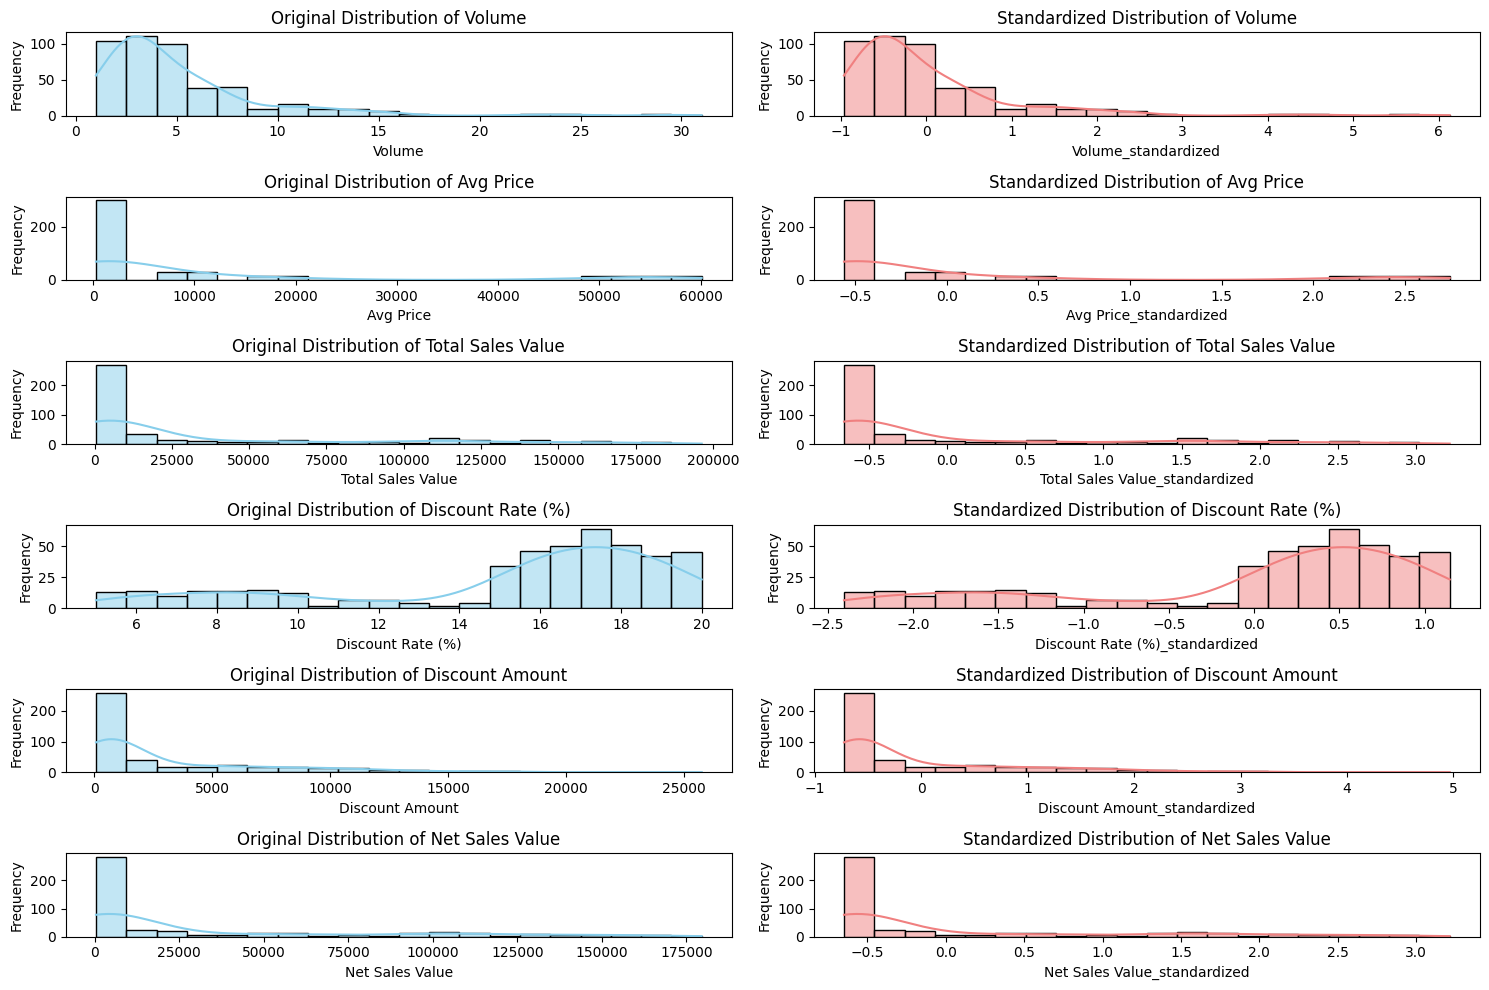

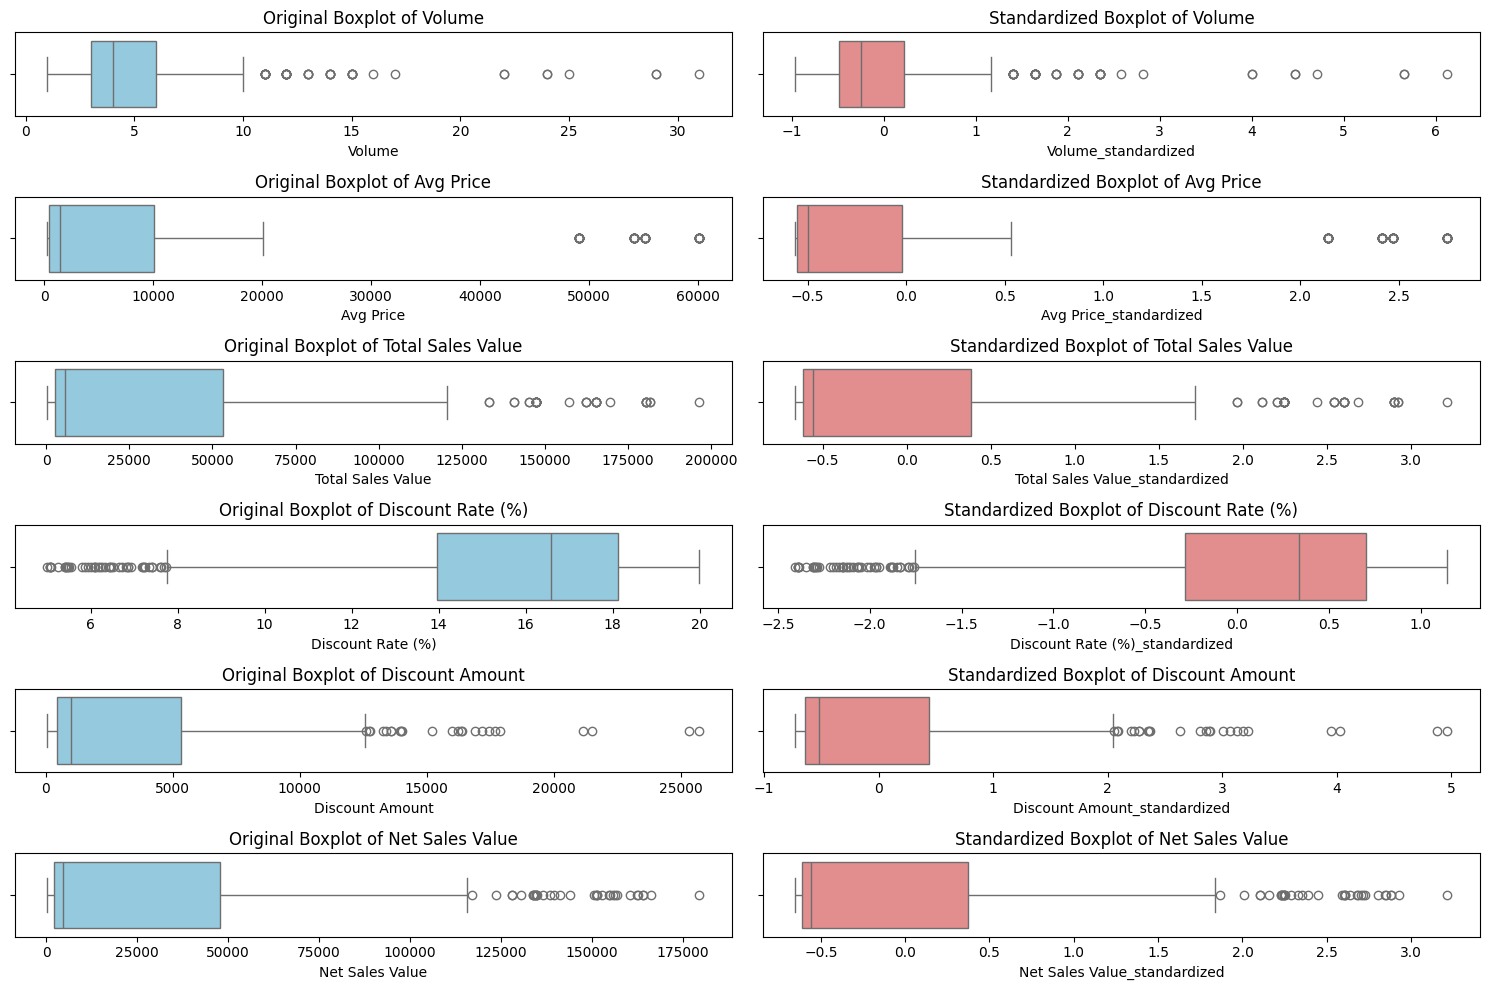

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical columns (already identified in previous steps)
numerical_cols = ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']
standardized_cols = [col + '_standardized' for col in numerical_cols]

# Set up the matplotlib figure and axes
plt.figure(figsize=(15, 10))

# Plot histograms for original and standardized columns
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 2, 2*i + 1) # Create subplot for original histogram
    sns.histplot(df_sales[col], bins=20, kde=True, color='skyblue')
    plt.title(f'Original Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.subplot(len(numerical_cols), 2, 2*i + 2) # Create subplot for standardized histogram
    sns.histplot(df_sales[col + '_standardized'], bins=20, kde=True, color='lightcoral')
    plt.title(f'Standardized Distribution of {col}')
    plt.xlabel(f'{col}_standardized')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Set up the matplotlib figure and axes for boxplots
plt.figure(figsize=(15, 10))

# Plot boxplots for original and standardized columns
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols), 2, 2*i + 1) # Create subplot for original boxplot
    sns.boxplot(x=df_sales[col], color='skyblue')
    plt.title(f'Original Boxplot of {col}')
    plt.xlabel(col)

    plt.subplot(len(numerical_cols), 2, 2*i + 2) # Create subplot for standardized boxplot
    sns.boxplot(x=df_sales[col + '_standardized'], color='lightcoral')
    plt.title(f'Standardized Boxplot of {col}')
    plt.xlabel(f'{col}_standardized')

plt.tight_layout()
plt.show()

Before standardization, numerical data distributions vary in their center (mean) and spread (standard deviation), making direct comparison difficult. After standardization (z-score normalization), the distributions are centered around zero with a standard deviation of one, allowing for comparison on a uniform scale while preserving the original shape.

## Data wrangling

Convert categorical columns in the `df_sales` DataFrame to dummy variables.



Convert categorical columns to dummy variables using `pd.get_dummies()` and concatenate them with the original DataFrame.



In [8]:
# Identify categorical columns (already identified in previous steps)
categorical_cols = ['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']

# Create dummy variables and drop the first dummy variable for each categorical feature
# Specify dtype=int to get 0s and 1s instead of True and False
dummy_cols = pd.get_dummies(df_sales[categorical_cols], drop_first=True, dtype=int)

# Concatenate dummy variables with the original DataFrame and drop original categorical columns
df_sales = pd.concat([df_sales, dummy_cols], axis=1)
df_sales = df_sales.drop(categorical_cols, axis=1)

# Display first few rows of the updated DataFrame
display(df_sales.head())

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Volume_standardized,Avg Price_standardized,Total Sales Value_standardized,Discount Rate (%)_standardized,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,2.347417,0.091072,2.922469,-0.829365,...,0,0,0,0,0,0,0,0,0,0
1,10,10100,101000,11.560498,11676.102961,89323.897039,1.165831,-0.019548,1.329516,-0.851714,...,0,0,0,0,0,0,0,0,0,0
2,7,16100,112700,9.456886,10657.910157,102042.089843,0.456880,0.312312,1.561038,-1.350129,...,0,0,0,0,0,0,0,0,1,0
3,6,20100,120600,6.935385,8364.074702,112235.925298,0.220563,0.533552,1.717365,-1.947555,...,0,0,0,0,0,0,0,0,0,1
4,3,8100,24300,17.995663,4372.946230,19927.053770,-0.488389,-0.130168,-0.188242,0.672990,...,0,0,0,0,0,0,0,1,0,0


## Summary:


### Data Analysis Key Findings
* The average sales volume is 5.07 units, with the most frequent volume being 5 units.  Financial metrics like average price, total sales value, discount amount, and net sales value exhibit greater variability.
* Initial data exploration revealed no missing values across all columns.
* Histograms and boxplots were generated to visualize the distributions of numerical variables, which could reveal skewness and outliers upon visual inspection.
* Bar charts illustrated the frequency distribution of categorical variables, allowing for the identification of potential imbalances in category representation.  
* Numerical features were standardized using z-score normalization, resulting in new columns with means close to zero and standard deviations of one.
* Categorical variables were successfully converted into dummy variables using one-hot encoding, effectively preparing the data for machine learning algorithms.  The original categorical columns were removed, and the new dummy columns were added to the dataframe.

### Insights or Next Steps
* Investigate the distributions of 'Avg Price', 'Total Sales Value', 'Discount Amount', and 'Net Sales Value' further for potential skewness or outliers, as indicated by the difference between their mean and median values.
* Analyze the visualized data (histograms, boxplots, and bar charts) to gain deeper insights into the data distributions and identify any patterns or anomalies.  The current analysis only shows the generation of the visualizations; the actual inspection and interpretation are missing.
